In [1]:
import stat_helper
import hdf_helper
from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
from dateutil.parser import parse
import datetime
import h5py

In [2]:
df = hdf_helper.h5_to_df('competitionfiles\COOLCAT_20091219_074253_24_20091219_074253_240.hdf')

In [3]:
std = df.std(axis = 0)

In [14]:
filtered = pd.DataFrame()
for channel in df.columns:
    filtered[channel] = gaussian_filter1d(df[channel].to_numpy(), 1)

array([ 0.0000000e+00, -9.1814400e-06, -4.0172860e-03, ...,
        8.0273438e-01, -8.4729004e-01, -3.5357666e-01], dtype=float32)

In [17]:
first_quartiles = filtered.quantile(q = 0.25, axis = 0)
third_quartiles = filtered.quantile(q = 0.75, axis = 0)
iqr = third_quartiles - first_quartiles

for channel in filtered.columns:
    filtered[channel].loc[filtered[channel] > third_quartiles[channel] + 1.5 * iqr[channel]] = np.NAN
    filtered[channel].loc[filtered[channel] < first_quartiles[channel] - 1.5 * iqr[channel]] = np.NAN

df_interpol = filtered.interpolate()
df_interpol

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
0,0.000000,0.336427,0.0,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,NaN,NaN,0.000000,0.0,0.039645,1.387583,NaN
1,0.000009,2.505010,0.0,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0,...,0.000029,-0.000008,0.0,NaN,NaN,-0.002657,0.0,1.553254,54.363888,NaN
2,0.004017,9.916680,0.0,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0,...,0.012855,-0.003461,0.0,NaN,NaN,-1.162479,0.0,25.390602,888.671082,NaN
3,0.157752,19.963442,0.0,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0,...,0.504808,-0.135906,0.0,NaN,NaN,-45.648766,0.0,201.526199,7053.416992,NaN
4,2.578733,21.983858,0.0,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0,...,8.251945,-2.220194,0.0,NaN,NaN,-746.245911,0.0,812.362427,28432.685547,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177704,993.229736,188.617630,768.0,128.0,136420720.0,0.0,-107.5,10.279397,9.287553,0.0,...,-1839.270874,-813.163086,0.0,21.786701,512.0,-30731.544922,198400.0,0.000000,89600.000000,8756.0
177705,992.000000,188.079041,768.0,128.0,136420736.0,0.0,-107.5,10.279947,9.287619,0.0,...,-1811.228760,-865.159058,0.0,21.793869,512.0,-30808.314453,198400.0,0.000000,89600.000000,8756.0
177706,990.770386,188.004852,768.0,128.0,136420736.0,0.0,-107.5,10.280022,9.287627,0.0,...,-1791.097412,-880.886902,0.0,21.778650,512.0,-30879.585938,198400.0,0.000000,89600.000000,8756.0
177707,989.274170,188.000122,768.0,128.0,136420736.0,0.0,-107.5,10.280026,9.287628,0.0,...,-1786.904053,-834.215881,0.0,21.762529,512.0,-30947.285156,198400.0,0.000000,89600.000000,8756.0


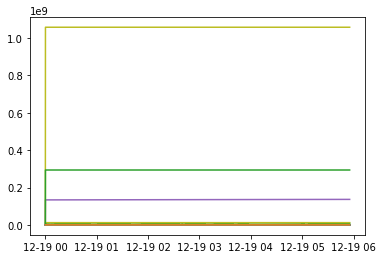

In [18]:
plt.plot(df_interpol)

In [26]:
filtered = pd.DataFrame()
for channel in df.columns:
    filtered[channel] = gaussian_filter1d(df[channel].to_numpy(), 1)

first_quartiles = filtered.quantile(q = 0.25, axis = 0)
third_quartiles = filtered.quantile(q = 0.75, axis = 0)
iqr = third_quartiles - first_quartiles

for channel in filtered.columns:
    filtered[channel].loc[filtered[channel] > third_quartiles[channel] + 1.5 * iqr[channel]] = np.NAN
    filtered[channel].loc[filtered[channel] < first_quartiles[channel] - 1.5 * iqr[channel]] = np.NAN

df_interpol = filtered.interpolate()

median = df.median()

for channel in df_interpol.columns:
    df_interpol[channel].loc[df_interpol[channel].isna()] = median[channel]
#     df_interpol[channel].fillna(median[channel])
    
df_interpol

,ch_1,ch_10,ch_100,ch_101,ch_102,ch_103,ch_104,ch_105,ch_106,ch_107,...,ch_90,ch_91,ch_92,ch_93,ch_94,ch_95,ch_96,ch_97,ch_98,ch_99
0,0.000000,0.336427,0.0,128.0,135057024.0,0.0,-107.5,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,19.969294,512.0,0.000000,0.0,0.039645,1.387583,7848.0
1,0.000009,2.505010,0.0,128.0,135057024.0,0.0,-107.5,0.000000,0.000000,0.0,...,0.000029,-0.000008,0.0,19.969294,512.0,-0.002657,0.0,1.553254,54.363888,7848.0
2,0.004017,9.916680,0.0,128.0,135057024.0,0.0,-107.5,0.000000,0.000000,0.0,...,0.012855,-0.003461,0.0,19.969294,512.0,-1.162479,0.0,25.390602,888.671082,7848.0
3,0.157752,19.963442,0.0,128.0,135057024.0,0.0,-107.5,0.000000,0.000000,0.0,...,0.504808,-0.135906,0.0,19.969294,512.0,-45.648766,0.0,201.526199,7053.416992,7848.0
4,2.578733,21.983858,0.0,128.0,135057024.0,0.0,-107.5,0.000000,0.000000,0.0,...,8.251945,-2.220194,0.0,19.969294,512.0,-746.245911,0.0,812.362427,28432.685547,7848.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177704,993.229736,188.617630,768.0,128.0,136420720.0,0.0,-107.5,10.279397,9.287553,0.0,...,-1839.270874,-813.163086,0.0,21.786701,512.0,-30731.544922,198400.0,0.000000,89600.000000,8756.0
177705,992.000000,188.079041,768.0,128.0,136420736.0,0.0,-107.5,10.279947,9.287619,0.0,...,-1811.228760,-865.159058,0.0,21.793869,512.0,-30808.314453,198400.0,0.000000,89600.000000,8756.0
177706,990.770386,188.004852,768.0,128.0,136420736.0,0.0,-107.5,10.280022,9.287627,0.0,...,-1791.097412,-880.886902,0.0,21.778650,512.0,-30879.585938,198400.0,0.000000,89600.000000,8756.0
177707,989.274170,188.000122,768.0,128.0,136420736.0,0.0,-107.5,10.280026,9.287628,0.0,...,-1786.904053,-834.215881,0.0,21.762529,512.0,-30947.285156,198400.0,0.000000,89600.000000,8756.0
